# 0. LOADING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()


'c:\\Users\\sanni\\Downloads\\HEART DISEASE\\src'

# 1. DATA COLLECTION

In [2]:
data = pd.read_csv('../data/Cardiovascular_Disease_Dataset.csv')
print('[info] data loaded successfully...')

[info] data loaded successfully...


In [3]:
data

,id,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


**taking a look at the dataset, all the columns have numbers and none of them have text labels**

**this makes the pre-processing part a little simple for us.**

# 2. EDA(EXPLORATORY DATA ANALYSIS)

In [4]:
data.columns

Index(['id', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

**looking at the column names in the dataset...**

**'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia','oldpeak', 'slope', 'noofmajorvessels'** are input columns

**target** will be output column

In [5]:
data.shape

(1000, 14)

In [6]:
data.isna().sum()

id                   0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

**checking if the dataset has any unwanted/NaN values in the samples**

**fortunately we do not have any NaN values, this will make pre-processing simpler again...**

In [7]:
data['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

In [8]:
# we will drop 'id' column as it is not required
data = data.drop('id', axis=1)

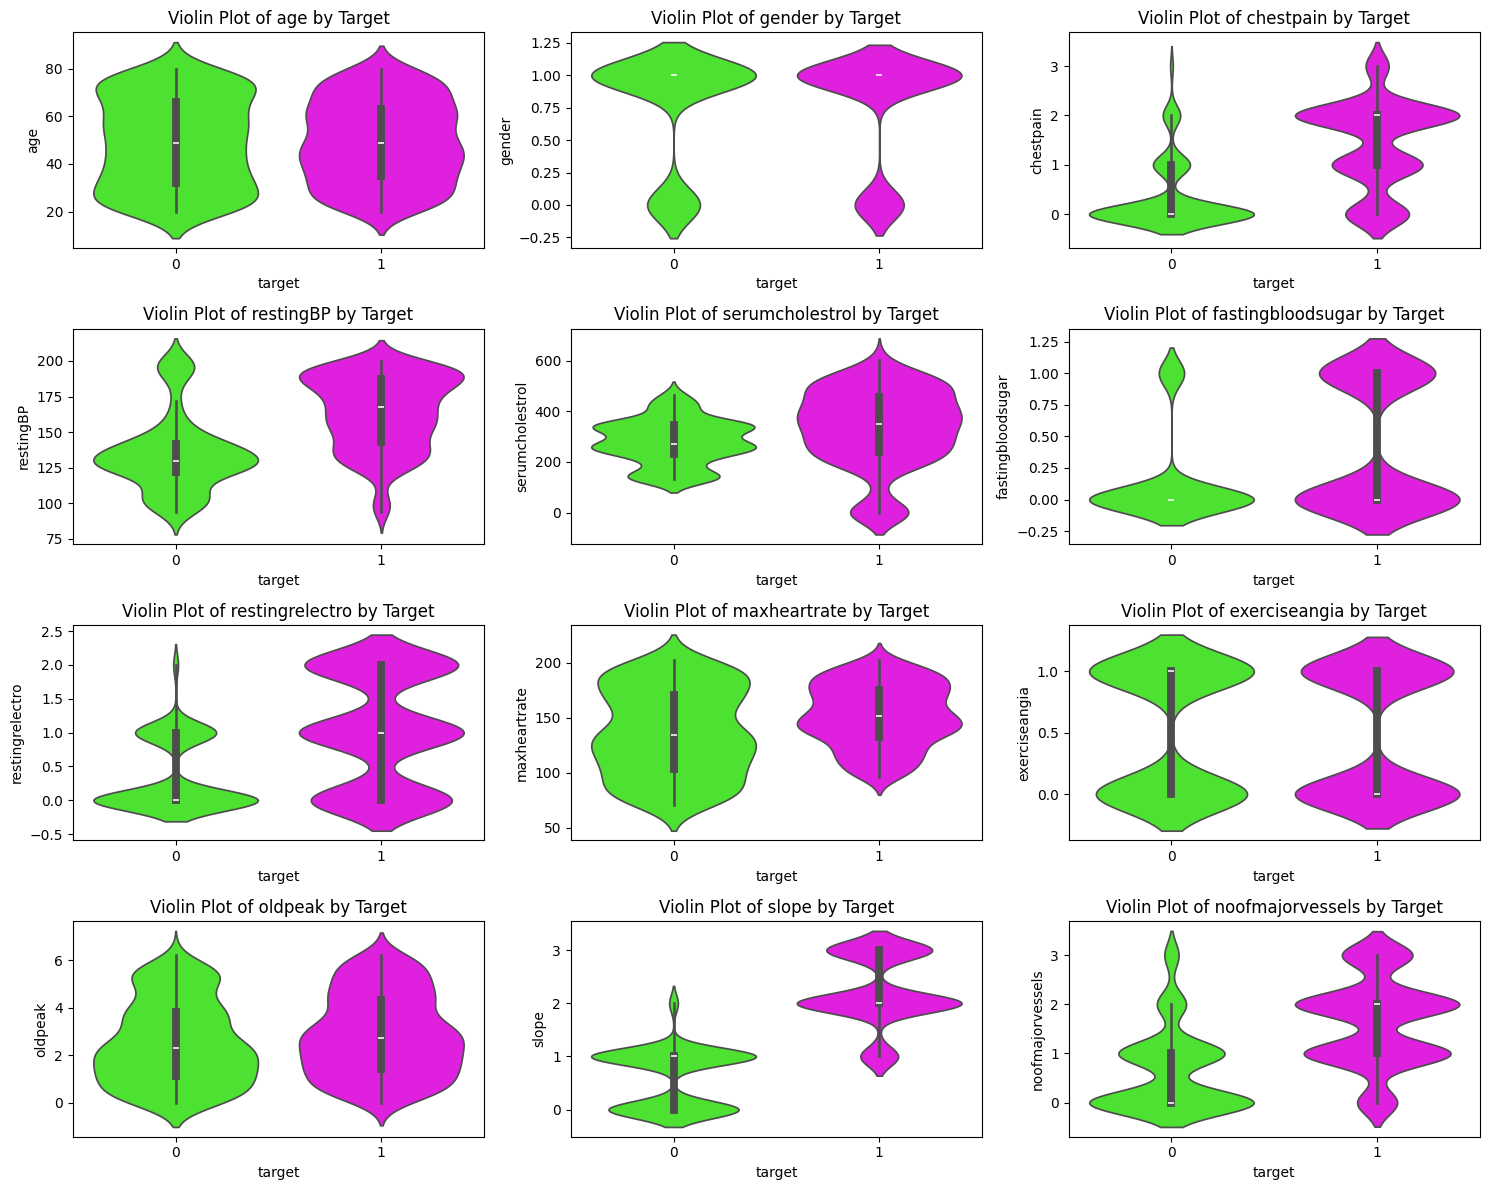

In [9]:
# Define a custom neon theme palette
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette
sns.set_palette(neon_palette)

# Create a grid for displaying violin plots
num_columns = len(data.columns) - 1  # Exclude the target column
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, 3, i + 1)
    sns.violinplot(x="target", y=column, data=data, palette=neon_palette)
    plt.title(f"Violin Plot of {column} by Target")

# Adjust layout
plt.tight_layout()

# Show the grid of violin plots
plt.savefig('static/eda/eda1.png')
plt.show()

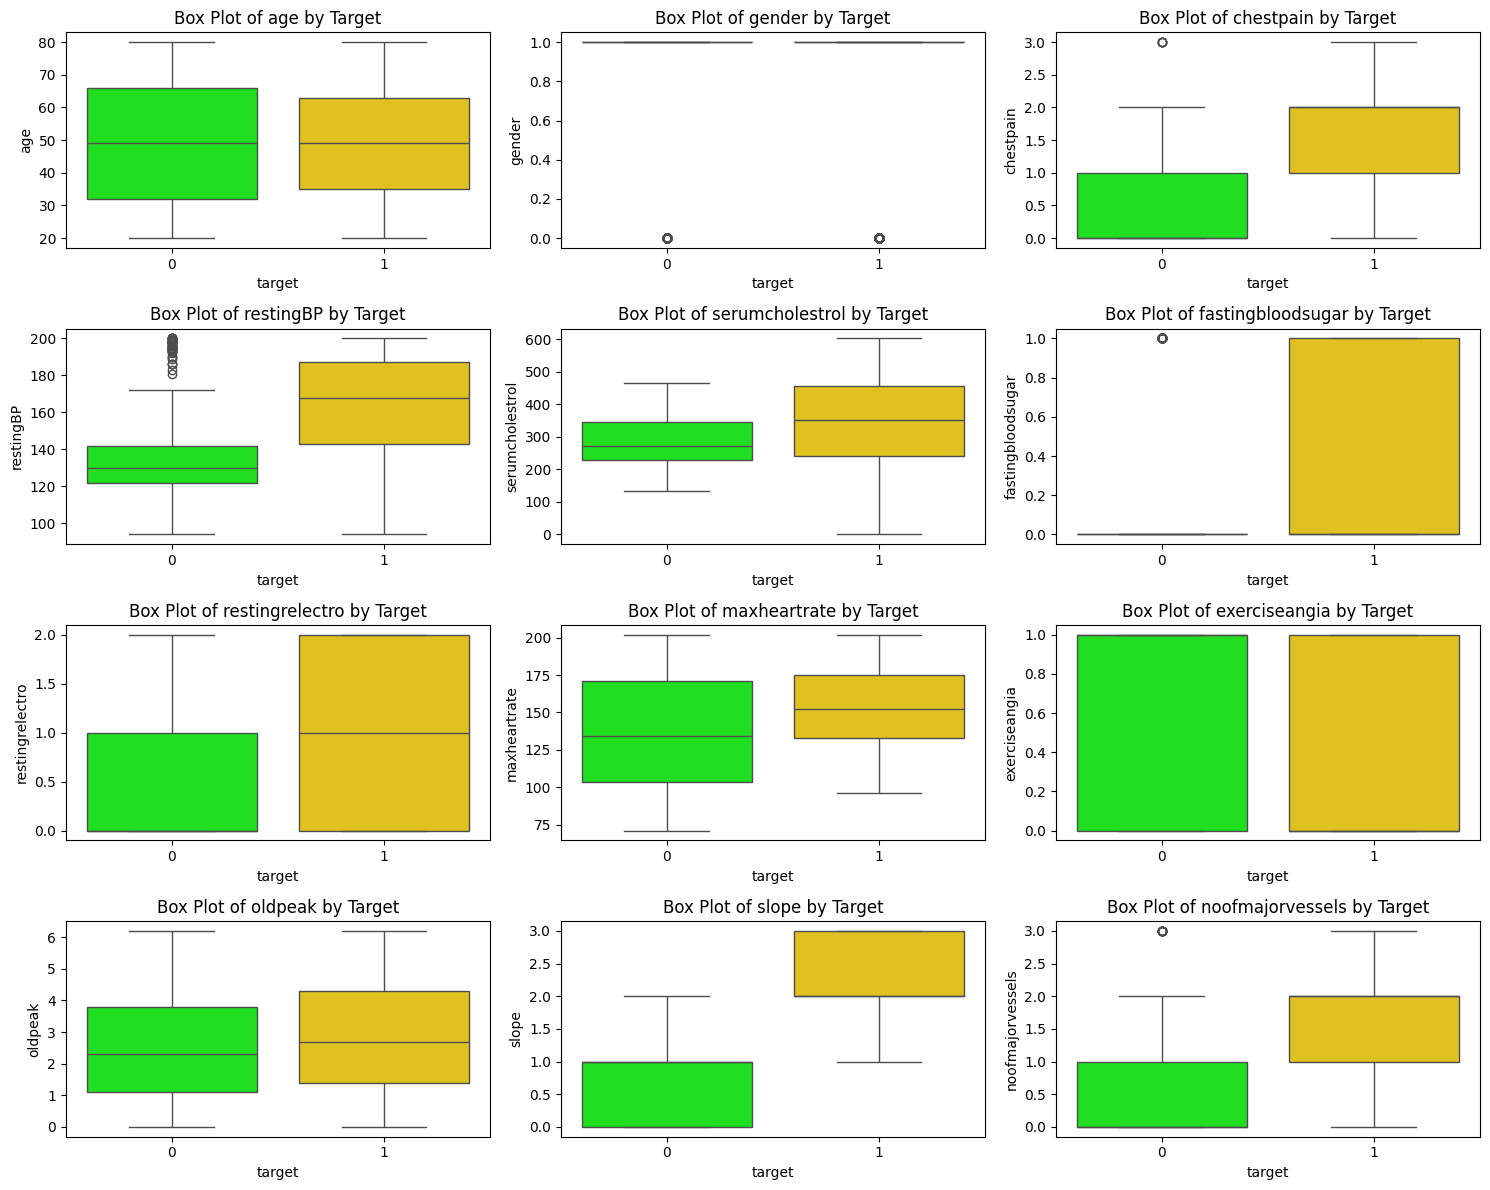

In [10]:
# Define another custom neon theme palette
neon_palette2 = ["#00FF00", "#FFD700"]

# Set the custom neon theme palette
sns.set_palette(neon_palette2)

# Create a grid for displaying box plots
num_columns = len(data.columns) - 1  # Exclude the target column
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x="target", y=column, data=data, palette=neon_palette2)
    plt.title(f"Box Plot of {column} by Target")

# Adjust layout
plt.tight_layout()
plt.savefig('static/eda/eda2.png')

# Show the grid of box plots
plt.show()

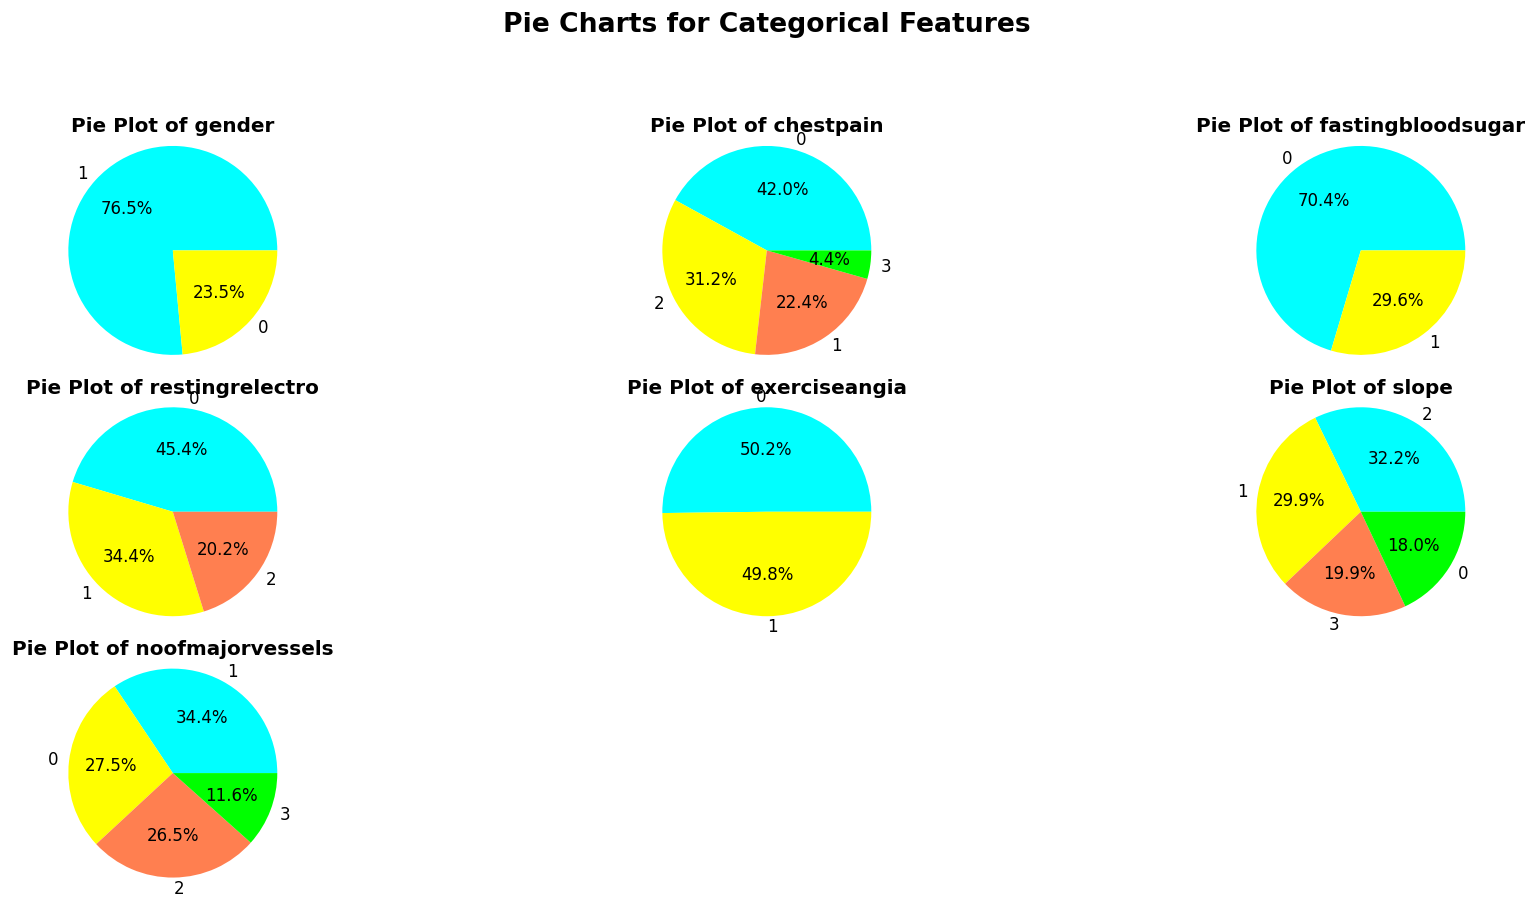

In [11]:
# Define a custom neon theme palette
neon_palette3 = ["#00FFFF", "#FFFF00", "#FF7F50", "#00FF00"]

# Set the custom neon theme palette
sns.set_palette(neon_palette3)

# Create a grid for displaying pie plots
num_columns = len(data.columns)

# Determine the number of rows and columns for the grid
num_rows = int(np.ceil(num_columns / 3))
num_cols = min(3, num_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), dpi=120)
fig.subplots_adjust(wspace=0.5, hspace=0.8)

plot_count = 0  # Track the number of valid plots

for i, column in enumerate(data.columns):
    if column != 'target':
        unique_values = len(data[column].unique())
        if unique_values <= 4:
            row_idx = plot_count // num_cols
            col_idx = plot_count % num_cols
            ax = axes[row_idx, col_idx]

            # Add a pie chart with improved visual styling
            data[column].value_counts().plot.pie(
                autopct='%1.1f%%', 
                ax=ax, 
                colors=neon_palette3, 
                radius=1.2, 
                textprops={'fontsize': 10, 'color': 'black'}
            )
            ax.set_title(f"Pie Plot of {column}", fontsize=12, fontweight='bold', color='black')
            ax.set_ylabel('')  # Remove default y-axis label
            plot_count += 1

# Remove any empty subplots
for i in range(plot_count, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Add a central title for the grid
fig.suptitle("Pie Charts for Categorical Features", fontsize=16, fontweight='bold', color='black', y=0.98)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the central title
# plt.savefig('static/eda/eda3.png', bbox_inches='tight', dpi=300)

# Show the grid of pie plots
plt.show()

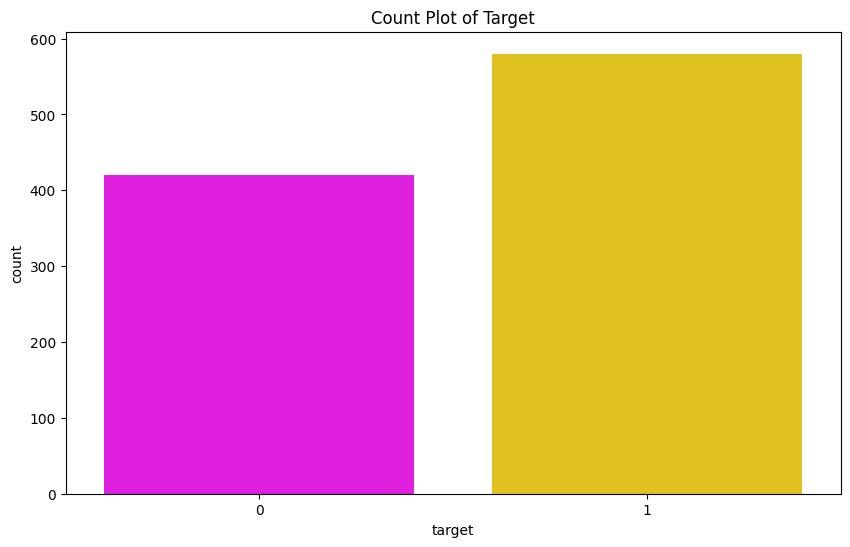

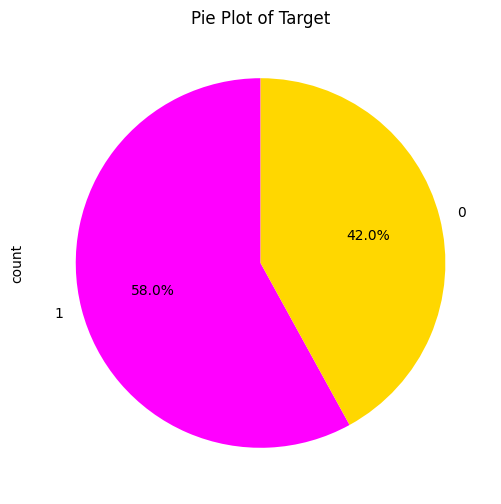

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom neon theme palette
neon_palette4 = ["#FF00FF", "#FFD700"]

# Set the custom neon theme palette
sns.set_palette(neon_palette4)

# Count Plot for the "target" column with different colors for each class
plt.figure(figsize=(10, 6))
sns.countplot(x="target", data=data, palette=neon_palette4)  # Specify the palette
# plt.savefig('eda3.png')
plt.title("Count Plot of Target")
plt.savefig('static/eda/eda3.png')
# Show the count plot
plt.show()

# pie Plot for the "target" column with different colors for each class
plt.figure(figsize=(10, 6))
data['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=neon_palette4,startangle=90)
plt.title("Pie Plot of Target")
plt.savefig('static/eda/eda4.png')

# Show the pie plot
plt.show()

# 3. DATA PRE-PROCESSING

In [13]:
data = data.sample(frac=1)

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print('[info] data segregation complete...')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('[info] data splitting complete...')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print('[info] data pre-processing complete...')

[info] data segregation complete...
[info] data splitting complete...
[info] data pre-processing complete...


# 4. INDIVIDUAL MODEL TRAINING

### a. LOGISTIC REGRESSION

[info] logistic regression model training complete...

LOGISTIC REGRESSION : MODEL PARAMETERS

accuracy :  0.96
precision :  0.9640718562874252
recall :  0.9640718562874252
f1 score :  0.9640718562874252

LOGISTIC REGRESSION : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.96      0.96      0.96       167

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



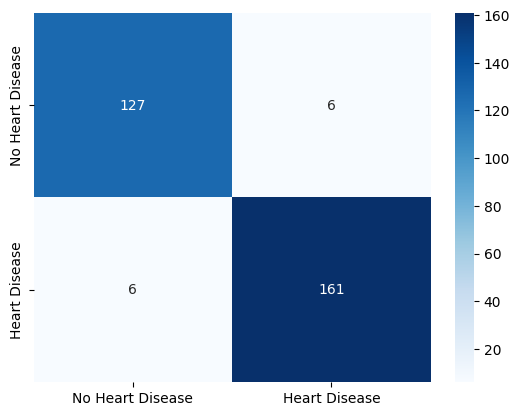

['assets/logistic_regression.pkl']

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
print('[info] logistic regression model training complete...')

y_predict_lr = lr.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nLOGISTIC REGRESSION : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_lr,y_actual))
print('precision : ',precision_score(y_predict_lr,y_actual))
print('recall : ',recall_score(y_predict_lr,y_actual))
print('f1 score : ',f1_score(y_predict_lr,y_actual))

from sklearn.metrics import classification_report
print('\nLOGISTIC REGRESSION : CLASSIFICATION REPORT\n\n',classification_report(y_predict_lr,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_lr,y_actual),
            cmap='Blues',annot=True,fmt='d',
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.savefig('static/model_parameter/1_logistic_regression_confusion_matrix.png')
plt.show()

import joblib
joblib.dump(lr,'assets/logistic_regression.pkl')

### b. RANDOM FOREST

[info] random forest model training complete...

RANDOM FOREST : MODEL PARAMETERS

accuracy :  0.9633333333333334
precision :  0.9580838323353293
recall :  0.975609756097561
f1 score :  0.9667673716012085

RANDOM FOREST : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       136
           1       0.96      0.98      0.97       164

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



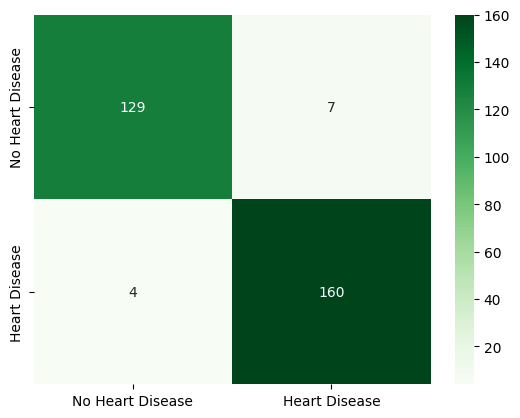

['assets/random_forest.pkl']

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion="entropy")
rf.fit(x_train_scaled,y_train)
print('[info] random forest model training complete...')

y_predict_rf = rf.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nRANDOM FOREST : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_rf,y_actual))
print('precision : ',precision_score(y_predict_rf,y_actual))
print('recall : ',recall_score(y_predict_rf,y_actual))
print('f1 score : ',f1_score(y_predict_rf,y_actual))

from sklearn.metrics import classification_report
print('\nRANDOM FOREST : CLASSIFICATION REPORT\n\n',classification_report(y_predict_rf,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_rf,y_actual),
            cmap='Greens',annot=True,fmt='d',
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.savefig('static/model_parameter/2_random_forest_confusion_matrix.png')
plt.show()

import joblib
joblib.dump(rf,'assets/random_forest.pkl')

### c. DECISION TREE

[info] decision tree model training complete...

 DECISION TREE : MODEL PARAMETERS

accuracy :  0.9633333333333334
precision :  0.9580838323353293
recall :  0.975609756097561
f1 score :  0.9667673716012085

DECISION TREE : CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       136
           1       0.96      0.98      0.97       164

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



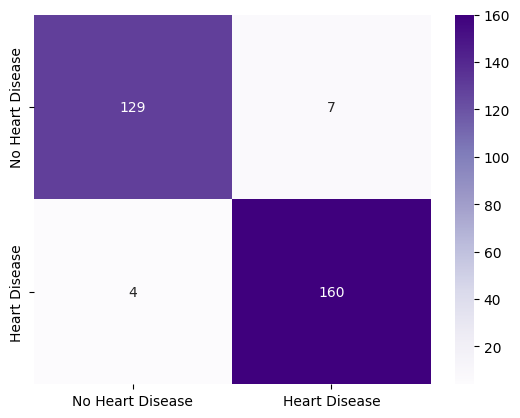

['assets/decision_tree.pkl']

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train_scaled,y_train)
print('[info] decision tree model training complete...')

y_predict_dt = dt.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\n DECISION TREE : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict_dt,y_actual))
print('precision : ',precision_score(y_predict_dt,y_actual))
print('recall : ',recall_score(y_predict_dt,y_actual))
print('f1 score : ',f1_score(y_predict_dt,y_actual))

from sklearn.metrics import classification_report
print('\nDECISION TREE : CLASSIFICATION REPORT\n\n',classification_report(y_predict_dt,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict_dt,y_actual),
            cmap='Purples',annot=True,fmt='d',
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.savefig('static/model_parameter/3_decision_tree_confusion_matrix.png')
plt.show()

import joblib
joblib.dump(rf,'assets/decision_tree.pkl')

# 5. HYBRID MODEL TRAINING

In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.1/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.6/124.9 MB 3.9 MB/s eta 0:00:32
   - -------------------------------------- 3.7/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 5.5/124.9 MB 4.5 MB/s eta 0:00:27
   -- ------------------------------------- 7.3/124.9 MB 5.2 MB/s eta 0:00:23
   --- ------------------------------------ 9.4/124.9 MB 5.7 MB/s eta 0:00:21
   --- ------------------------------------ 11.3/124.9 MB 6.1 MB/s eta 0:00:19
   ---- ----------------------------------- 12.8/124.9 MB 6.2 MB/s eta 0:00:18
   ---- ----------------------------------- 14.9/124.9 MB 6.6 MB/s eta 0:00:17
   ----- ---------------------------------- 17.3/124.9 MB 6.9 MB/s eta 0:00

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the meta-model (XGBoost)
from xgboost import XGBClassifier
meta_model = XGBClassifier()

# Create the StackingClassifier
from sklearn.ensemble import StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('dt', dt)
    ],
    final_estimator=meta_model,
    cv=5  # You can adjust the number of cross-validation folds as needed
)

# Train the stacked model
stacked_model = stacked_model.fit(x_train_scaled, y_train)
print('[info] hybrid model training complete...')

import joblib
joblib.dump(stacked_model,'assets/stacked_model.pkl')#for predicting output
joblib.dump(scaler,'assets/scaler.pkl')#for scaling the user input

[info] hybrid model training complete...


['assets/scaler.pkl']

# 6. HYBRID MODEL EVALUATION


STACKED MODEL : MODEL PARAMETERS

accuracy :  0.97
precision :  0.9760479041916168
recall :  0.9702380952380952
f1 score :  0.973134328358209

STACKED MODEL CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.98      0.97      0.97       168

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



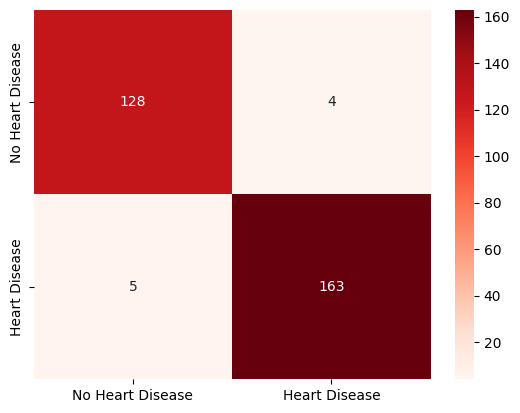

In [20]:
import joblib
stacked_model = joblib.load('assets/stacked_model.pkl')

y_predict = stacked_model.predict(x_test)
y_actual = y_test

#comparing actual answers vs model predictions to get the model parameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nSTACKED MODEL : MODEL PARAMETERS\n')
print('accuracy : ',accuracy_score(y_predict,y_actual))
print('precision : ',precision_score(y_predict,y_actual))
print('recall : ',recall_score(y_predict,y_actual))
print('f1 score : ',f1_score(y_predict,y_actual))

from sklearn.metrics import classification_report
print('\nSTACKED MODEL CLASSIFICATION REPORT\n\n',classification_report(y_predict,y_actual))

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict,y_actual),
            cmap='Reds',annot=True,fmt='d',
            xticklabels=['No Heart Disease','Heart Disease'],
            yticklabels=['No Heart Disease','Heart Disease'])
plt.savefig('static/model_parameter/4_stacked_model_confusion_matrix.png')
plt.show()

# 7. MODEL IMPLEMENTATION

In [24]:
import joblib
scaler = joblib.load('assets/scaler.pkl')
lr_model = joblib.load('assets/logistic_regression.pkl')
rf_model = joblib.load('assets/random_forest.pkl')
dt_model = joblib.load('assets/decision_tree.pkl')
hybrid_model = joblib.load('assets/stacked_model.pkl')

# Prompt the user for input for specific features
age = int(input('Enter age: '))
gender = int(input('Enter gender (0 for female, 1 for male): '))
chestpain = int(input('Enter chest pain type (0-3): '))
restingBP = int(input('Enter resting blood pressure: '))
serumcholestrol = int(input('Enter serum cholesterol level: '))
fastingbloodsugar = int(input('Enter fasting blood sugar (0 for false, 1 for true): '))
restingrelectro = int(input('Enter resting ECG result (0-2): '))
maxheartrate = int(input('Enter maximum heart rate: '))
exerciseangia = int(input('Enter exercise-induced angina (0 for no, 1 for yes): '))
oldpeak = float(input('Enter old peak (ST depression): '))
slope = int(input('Enter slope (0-2): '))
noofmajorvessels = int(input('Enter number of major vessels (0-3): '))

# Create a new input array based on the features
new_user_input = [[
    age, gender, chestpain, restingBP, serumcholestrol,
    fastingbloodsugar, restingrelectro, maxheartrate,
    exerciseangia, oldpeak, slope, noofmajorvessels
]]

# Scale the input data
new_user_input_scaled = scaler.transform(new_user_input)

In [25]:
# 103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
# 119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0

In [26]:
# Predict using the model
lr_diagnosis = lr_model.predict(new_user_input_scaled)
rf_diagnosis = rf_model.predict(new_user_input_scaled)
dt_diagnosis = dt_model.predict(new_user_input_scaled)
hybrid_diagnosis = hybrid_model.predict(new_user_input_scaled)

diagnosis_dict = {
    0: 'No Heart Disease',
    1: 'Heart Disease'}

# Print the result
print(f"\nLogistic Regression Prediction: {diagnosis_dict[lr_diagnosis[0]]}")
print(f"Random Forest Prediction: {diagnosis_dict[rf_diagnosis[0]]}")
print(f"Decision Tree Prediction: {diagnosis_dict[dt_diagnosis[0]]}")
print(f"Hybrid Model Prediction: {diagnosis_dict[hybrid_diagnosis[0]]}")


Logistic Regression Prediction: No Heart Disease
Random Forest Prediction: No Heart Disease
Decision Tree Prediction: No Heart Disease
Hybrid Model Prediction: No Heart Disease


## TEST CASES

In [4]:
import pandas as pd
data = pd.read_csv(r'C:\Users\sanni\Downloads\HEART DISEASE\data\Cardiovascular_Disease_Dataset.csv')

heart_disease_filter = data['target'] == 1
print('TEST CASES FOR POSITIVE HEART DISEASE')
data[heart_disease_filter].head(5)

TEST CASES FOR POSITIVE HEART DISEASE


,id,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1


In [5]:

no_heart_disease_filter = data['target'] == 0
print('TEST CASES FOR NO HEART DISEASE')
data[no_heart_disease_filter].head(5)

TEST CASES FOR NO HEART DISEASE


,id,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
